# NoteBook imports

In [12]:

import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
from PIL import Image
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

# constants

In [31]:
SPAM_CAT = 1
HAM_CAT = 0
VOCAB_SIZE = 2500

TOKEN_SPAM_PROB_FILE = 'SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'SpamData/03_Testing/prob-nonspam.txt'
TOKEN_ALL_PROB_FILE = 'SpamData/03_Testing/prob-all-tokens.txt'

TEST_FEATURE_MATRIX = 'SpamData/03_Testing/test-features.txt'
TEST_TARGET_FILE = 'SpamData/03_Testing/test-target.txt'

# Load the Data

In [32]:
# Features
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')
# Target
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')
#Token probabilities
prop_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prop_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prop_all_tokens = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')

In [33]:
# Calculating the joint probability
### The Dot Product

In [34]:
a = np.array([1,2,3])
b = np.array([0,5,4])
a.dot(b)

22

In [35]:
c = np.array([[0,6],[3,0], [5,1]])
c.shape

(3, 2)

In [36]:
a.dot(c) # returns array insted of one value

array([21,  9])

In [37]:
prop_token_spam.dot(X_test)

ValueError: shapes (2500,) and (1724,2500) not aligned: 2500 (dim 0) != 1724 (dim 0)

In [38]:
X_test.dot(prop_token_spam)

array([0.43074024, 0.14572173, 0.14634242, ..., 0.57102676, 0.09088317,
       0.26089558])

## Set the prior

 # $P(SPAM \, | \, X) = \frac{P(X \, | \, Spam \,) \, P(Spam)} {P(X)} $

In [39]:
PROB_SPAM = 0.3116

In [40]:
np.log(prop_token_spam)

array([ -4.40759195,  -5.25366675,  -4.99006919, ...,  -9.26099994,
        -9.38616308, -11.4010661 ])

## Joint Probability in log format

In [41]:
joint_log_spam = X_test.dot(np.log(prop_token_spam) - np.log(prop_all_tokens)) + np.log(PROB_SPAM)
joint_log_spam[:5]

array([24.28360787,  2.16305488, 20.59344354, 17.75865473, 20.51721085])

In [42]:
joint_log_ham = X_test.dot(np.log(prop_token_ham) - np.log(prop_all_tokens)) + np.log(1- PROB_SPAM)
joint_log_ham[:5]

array([-60.9732416 , -11.01142777, -37.96955526, -59.13793992,
       -53.80718869])

In [43]:
joint_log_ham.size

1724

# Making predictions
## Checking for the higher joint probability


$P(Spam \, | \, X) > \, P(Ham \, | \, X) $
<h1>OR</h1>

$P(Spam \, | \, X) < \, P(Ham \, | \, X) $

In [44]:
prediction = joint_log_spam > joint_log_ham
prediction[-5:]


array([ True, False, False, False, False])

In [45]:
y_test[-5:]

array([0., 0., 0., 0., 0.])

# simplify
 # $P(X \, | \, Spam) \, P(Spam) != \frac{P(Spam \, | \, X \,) \, P(Spam)} {P(X)} $

In [46]:
joint_log_spam = X_test.dot(np.log(prop_token_spam))+ np.log(PROB_SPAM)
joint_log_ham = X_test.dot(np.log(prop_token_ham)) + np.log(1- PROB_SPAM)

# Metrics and Evaluation

## Accuracy

In [47]:
correct_doc = (y_test == prediction).sum()
print("docs classified correctly ", correct_doc)
numdocs_wrong = X_test.shape[0] - correct_doc
print("|docs classefied incorrectly ", numdocs_wrong)

docs classified correctly  1685
|docs classefied incorrectly  39


In [48]:
# Accuracy of the model
fraction_true = correct_doc/len(X_test)

In [49]:
fraction_wrong = numdocs_wrong/len(X_test)
fraction_wrong

0.02262180974477958

In [50]:
fraction_true + fraction_wrong

1.0

# Visualising the results

In [55]:
# chart styling info:
yaxis_label = 'P(x | Spam)'
xaxis_label = 'P(x | NonSpam)'

linedata = np.linspace(start=-14000, stop=1, num=1000)

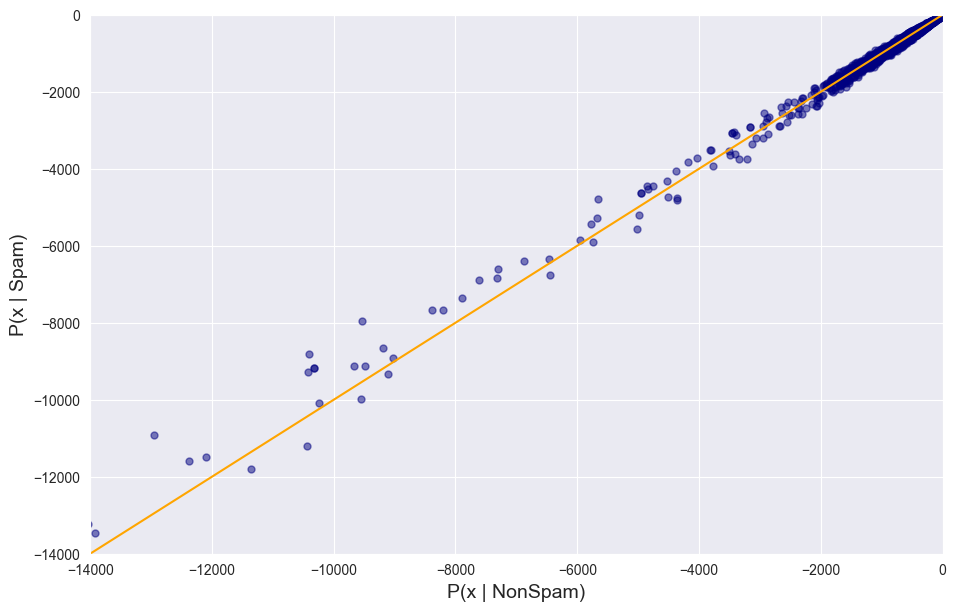

In [60]:
plt.figure(figsize=(11,7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

#Set Scatter
plt.xlim([-14000,1])
plt.ylim([-14000,1])
plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5,  label='Classification', s=25)
plt.plot(linedata, linedata, color='orange')
plt.show()

# The Decision boundary

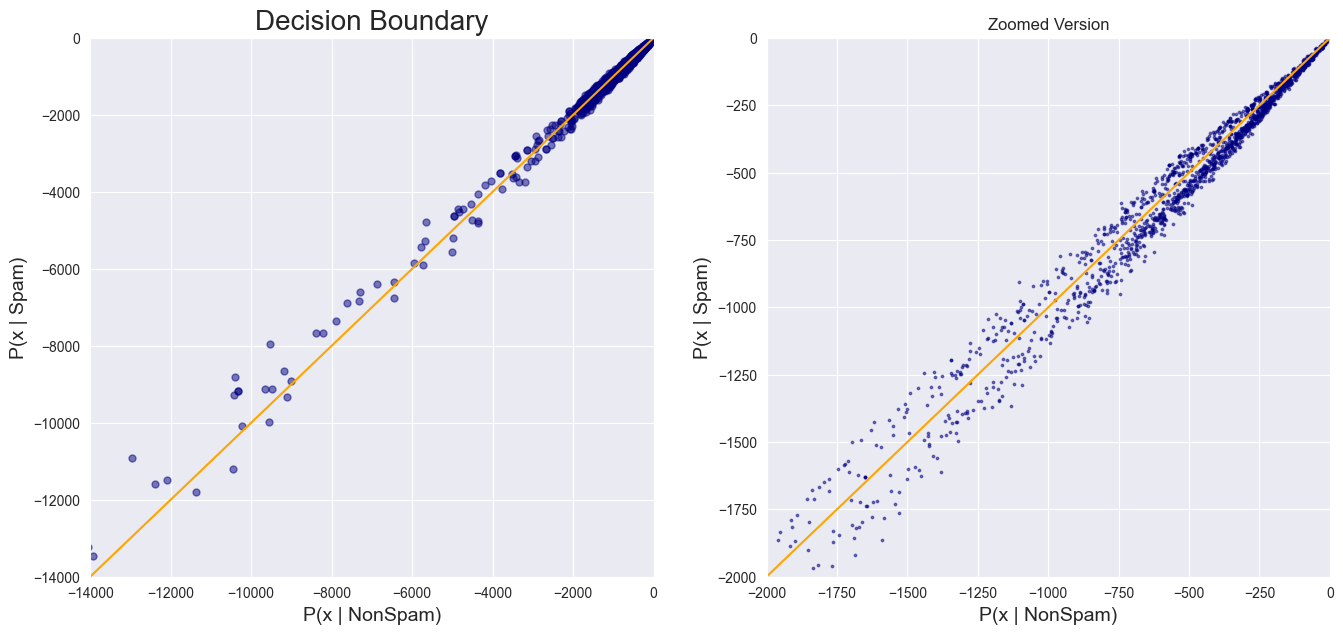

In [63]:
plt.figure(figsize=(16,7))
 #chart 1
plt.subplot(1,2,1)
plt.title("Decision Boundary", fontsize=20)
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

#Set Scatter
plt.xlim([-14000,1])
plt.ylim([-14000,1])
plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5,  label='Classification', s=25)
plt.plot(linedata, linedata, color='orange')

#chart 2
plt.subplot(1,2,2)
plt.title("Zoomed Version")
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)
#Set Scatter
plt.xlim([-2000,1])
plt.ylim([-2000,1])
plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5,  label='Classification', s=3)
plt.plot(linedata, linedata, color='orange')



plt.show()

In [64]:
# Chart Styling
sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label: joint_log_ham, labels: y_test})

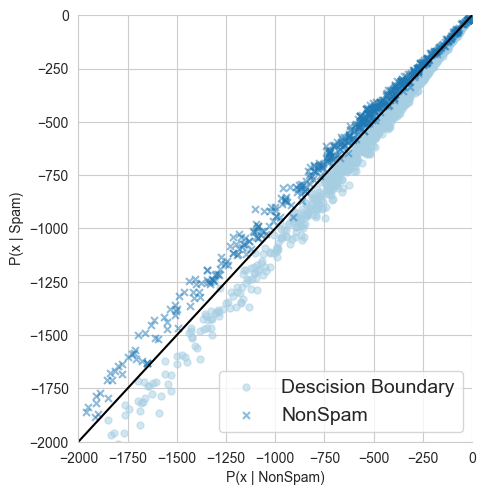

In [80]:
sns.lmplot(x=xaxis_label, y=yaxis_label,  data=summary_df,hue=labels, fit_reg=False,legend=False, scatter_kws={'alpha':0.5, 's':25}, markers=['o','x'], palette='Paired')
plt.xlim([-2000,1])
plt.ylim([-2000,1])

plt.legend(('Descision Boundary', 'NonSpam', 'Spam'), loc='lower right', fontsize=14)
plt.plot(linedata, linedata, color='black')
plt.show()

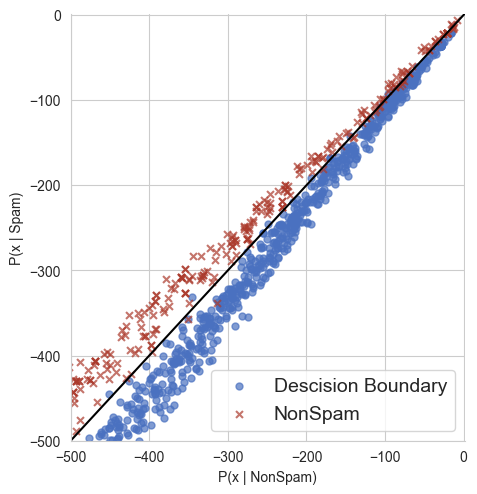

In [84]:
my_colors = [ '#4A71C0','#AB3A2C']
sns.lmplot(x=xaxis_label, y=yaxis_label,  data=summary_df,hue=labels, fit_reg=False,legend=False,
           scatter_kws={'alpha':0.7, 's':25}, markers=['o','x'], palette=my_colors)
plt.xlim([-500,1])
plt.ylim([-500,1])

plt.legend(('Descision Boundary', 'NonSpam', 'Spam'), loc='lower right', fontsize=14)
plt.plot(linedata, linedata, color='black')
plt.show()

# False positives and False Negatives

In [85]:
np.unique(prediction,return_counts=True)
# in false the prediction is wrong and y_test is the acctual state

(array([False,  True]), array([1136,  588], dtype=int64))

In [86]:
true_pos = (y_test == 1) & (prediction == 1)

In [87]:
true_pos.sum()

569

In [91]:
false_pos =  (y_test == 0) & (prediction == 1)
true_neg = (y_test == 0) & (prediction == 0)
false_neg = (y_test == 1) & (prediction == 0)
print("false neg: ", false_neg.sum())
print("false pos: ", false_pos.sum())
print("true neg: ", true_neg.sum())

false neg:  20
false pos:  19
true neg:  1116


## Recall Score  = $\frac {True Positives}{True Positives + False Negatives}$

In [95]:
recall_score = true_pos.sum()/ (true_pos.sum() + false_neg.sum())
print('Recall score is {:.2%}'.format(recall_score))

Recall score is 96.60%


## Precision Score  = $\frac {True Positives}{True Positives + False Positives}$

In [97]:
precision_score = true_pos.sum()/ (true_pos.sum() + false_pos.sum())
print('Precision score is {:.3%}'.format(precision_score))

Precision score is 96.769%


## F1 Score = $ 2* \, \frac {Precision \, * \, Recall} {Precision \, + \, Recall} $

In [99]:
f1_score = 2 * precision_score * recall_score / (precision_score + recall_score)
print('F1 Score is {:.2%}'.format(f1_score))

F1 Score is 96.69%
